In [122]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score,mean_absolute_percentage_error

In [123]:
data=pd.read_excel('Folds5x2_pp.xlsx')
data.head()

,Ambient Temparature,Vaccum,Ambient Pressure,Relative Humidity,Per hour Electricity
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [124]:
X=data.drop(['Per hour Electricity'],axis=1).values
y=data['Per hour Electricity']

In [125]:
X.shape

(9568, 4)

In [126]:
y.shape

(9568,)

In [127]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [128]:
x_train.shape

(6697, 4)

In [129]:
x_test.shape

(2871, 4)

In [130]:
y_train.shape

(6697,)

In [131]:
y_test.shape

(2871,)

In [149]:
model=LinearRegression()

In [150]:
model.fit(x_train,y_train)

LinearRegression()

In [151]:
Pred=model.predict(x_test)

In [152]:
Pred

array([464.65965087, 438.58895991, 483.58525618, ..., 464.58061083,
       441.64415024, 469.44613122])

In [153]:
# here we are checking the predict result that is how close the prediction from actual value.
# the numbers are first rows of X and done prediction is 467.2212 which is close to the actual 463.26
model.predict([[14.96,41.76,1024.07,73.17]])

array([467.27303794])

# Here the Evaluation Starts

In [154]:
#here we are testing the x_train,y_train data features
model.score(x_train,y_train)# its quite good because 1 is the last perfect score number. and it is near to 1

0.9304209156660203

In [155]:
# here we are testing the x_test,y_test data features
model.score(x_test,y_test)# it is also goot .near to 1 

0.92445785848982

Now Evaluation : 
    explained_variance-  metrics.explained_variance_score
	

‘max_error’-   metrics.max_error
	

‘mean_absolute_error’-   metrics.mean_absolute_error
	‘
`neg_mean_squared_error’-     metrics.mean_squared_error
	

‘neg_root_mean_squared_error’-    metrics.mean_squared_error or np.sqrt(mean_squared_error)
	

‘neg_mean_squared_log_error’-    metrics.mean_squared_log_error
	

‘neg_median_absolute_error’-    metrics.median_absolute_error
	

‘r2’-    metrics.r2_score
	

‘neg_mean_poisson_deviance’-    metrics.mean_poisson_deviance
	

‘neg_mean_gamma_deviance’-    metrics.mean_gamma_deviance
	

‘neg_mean_absolute_percentage_error’-    metrics.mean_absolute_percentage_error
	

‘d2_absolute_error_score’-    metrics.d2_absolute_error_score
	

‘d2_pinball_score’-    metrics.d2_pinball_score
	

‘d2_tweedie_score’-    metrics.d2_tweedie_score


Evaluation metrics;

    Mean/Median of prediction
    Standard Deviation of prediction
    Range of prediction
    Coefficient of Determination (R2)
    Relative Standard Deviation/Coefficient of Variation (RSD)
    Relative Squared Error (RSE)
    Mean Absolute Error (MAE)
    Relative Absolute Error (RAE)
    Mean Squared Error (MSE)
    Root Mean Squared Error on Prediction (RMSE/RMSEP)
    Normalized Root Mean Squared Error (Norm RMSEP)
    Relative Root Mean Squared Error (RRMSEP)


In [156]:
# For mean absolute error, the best value is  0.0. 
mabe=mean_absolute_error(y_test,Pred)
mabe

3.626794147620155

In [157]:
# for mean squared error, the best value is 0.0
mse=mean_squared_error(y_test,Pred)
mse

21.692890734596023

In [158]:
# for r2 score, the 1.0 if prediction is perfect, 0.0 otherwise.
#r2 score 
r2=r2_score(y_test,Pred)
r2

0.92445785848982

In [159]:
# for mean absolute percentage error,MAPE output is non-negative floating point.
#The best value is 0.0. But note that bad predictions can lead to arbitrarily large MAPE values,
#especially if some y_true  values are very close to zero
mabpe=mean_absolute_percentage_error(y_test,Pred)
mabpe

0.00798866524278561

Text(0, 0.5, 'Pred')

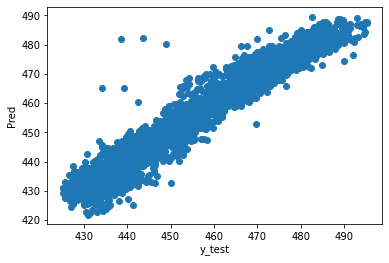

In [160]:
import matplotlib.pyplot as plt
plt.scatter(y_test,Pred)
plt.xlabel("y_test")
plt.ylabel('Pred')

# Printing the Difference between predicted and actual

In [161]:
pred_diff=pd.DataFrame({'Actual value:':y_test,'Predicted value':Pred,'Difference':y_test-Pred})
pred_diff

,Actual value:,Predicted value,Difference
4926,465.72,464.659651,1.060349
3010,436.27,438.588960,-2.318960
8455,485.57,483.585256,1.984744
3456,431.70,437.205424,-5.505424
8009,441.90,435.897873,6.002127
...,...,...,...
245,444.69,447.243749,-2.553749
8349,427.90,434.250915,-6.350915
1694,460.17,464.580611,-4.410611
7524,439.77,441.644150,-1.874150


In [162]:
np.mean(Pred)

454.9896644477809

In [165]:
# In LinearRegression instance resid do not work . so you can go for y_test-Pred.
residuals=y_test-Pred
residuals

4926    1.060349
3010   -2.318960
8455    1.984744
3456   -5.505424
8009    6.002127
          ...   
245    -2.553749
8349   -6.350915
1694   -4.410611
7524   -1.874150
297    -8.746131
Name: Per hour Electricity, Length: 2871, dtype: float64

In [166]:
X.shape

(9568, 4)

# Outlier's Analysis

In [147]:
# first we will go for Z-score
